# Plot data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
fs_data=pd.read_csv("fs_summary.csv")

In [3]:
fs_data.head(5)

,sample,n_rep,rf_mean,conc_mean,s_x,CI_low,CI_high,n_add
0,FS-15N-1,3,1.894745,0.429943,0.032616,0.362302,0.497584,3.75
1,FS-15N-2,3,1.496906,0.338468,0.032737,0.270575,0.406361,3.75
2,FS-15N-3,3,3.035858,0.692320,0.032417,0.625091,0.759548,3.75
3,FS-15N-4,3,8.154848,1.869330,0.034238,1.798324,1.940336,3.75
4,FS-15N-5,3,3.852337,0.880053,0.032412,0.812834,0.947272,3.75


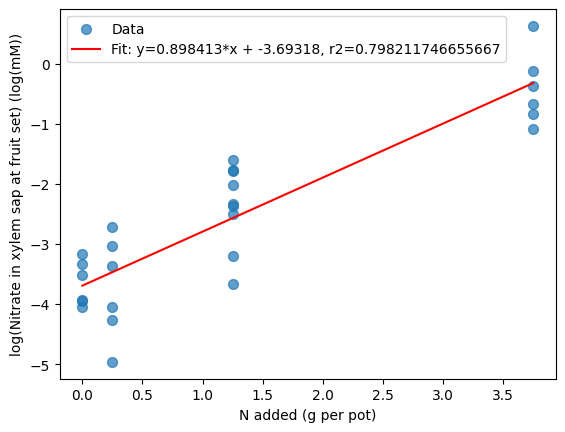

In [4]:
x=fs_data['n_add']
y=np.log(fs_data['conc_mean'])

slope,intercept,r,p,stderr=linregress(x,y)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit

plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit,y_fit, 'r-', label=f'Fit: y={slope:.6g}*x + {intercept:.6g}, r2={r**2}')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(Nitrate in xylem sap at fruit set) (log(mM))")
plt.legend()
plt.savefig("fruitset-linear.png")
plt.show()

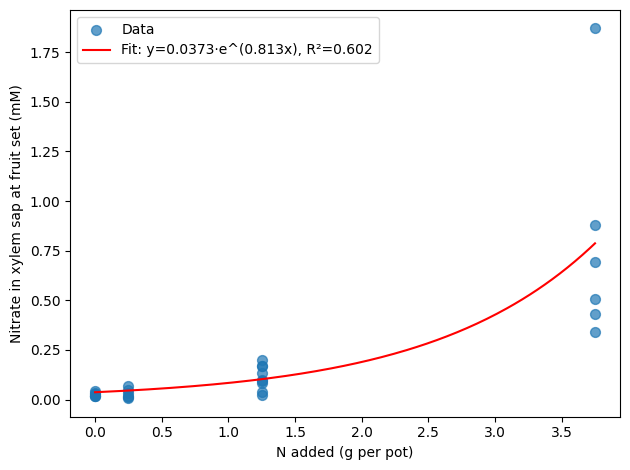

In [5]:
# define exponential model
def expo(x, a, b):
    return a * np.exp(b * x)

# filter to positive concentrations (log undefined for ≤0, and exp fits need >0)
mask = fs_data['conc_mean'] > 0
x = fs_data.loc[mask, 'n_add'].to_numpy()
y = fs_data.loc[mask, 'conc_mean'].to_numpy()

# initial guesses for parameters to help the optimizer
p0 = (y.min(), 0.05)

# fit exponential curve
popt, pcov = curve_fit(expo, x, y, p0=p0)
a, b = popt

# generate smooth x-values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = expo(x_fit, a, b)

residuals = y - expo(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

# plot data and fit
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.3g}·e^({b:.3g}x), R²={r2:.3f}')
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem sap at fruit set (mM)")
plt.legend()
plt.tight_layout()
plt.savefig("fruitset-exponential.png")
plt.show()

In [6]:
vern_data=pd.read_csv("vern_summary.csv")
veru_data=pd.read_csv("veru_summary.csv")

In [7]:
vern_data.head(5)

,sample,n_rep,rf_mean,conc_mean,s_x,CI_low,CI_high,n_add
0,V-15N-1,3,1.347076,0.304018,0.032790,0.236016,0.372019,3.75
1,V-15N-2,3,2.111994,0.479895,0.032561,0.412369,0.547422,3.75
2,V-15N-3,3,3.729934,0.851909,0.032406,0.784704,0.919114,3.75
3,V-15N-4,3,0.586650,0.129173,0.033114,0.060498,0.197847,3.75
4,V-15N-5,3,5.387625,1.233062,0.032714,1.165217,1.300906,3.75


In [8]:
veru_data.head(5)

,sample,n_rep,rf_mean,conc_mean,s_x,CI_low,CI_high,n_add
0,V-15NU-1,3,1.018655,0.228504,0.032918,0.160236,0.296772,3.75
1,V-15NU-2,3,1.559000,0.352745,0.032716,0.284896,0.420595,3.75
2,V-15NU-3,3,1.152898,0.259370,0.032863,0.191216,0.327525,3.75
3,V-15NU-4,3,1.298515,0.292852,0.032808,0.224813,0.360891,3.75
4,V-15NU-5,3,0.995920,0.223276,0.032928,0.154989,0.291564,3.75


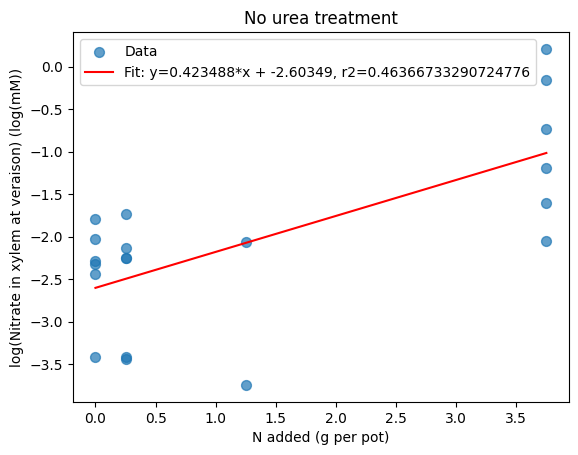

In [9]:
#We'll start by looking at the datasets separately before combining them

#Make sure we drop blanks
vern_data=vern_data.dropna()

x=vern_data['n_add']
y=np.log(vern_data['conc_mean'])

slope,intercept,r,p,stderr=linregress(x,y)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit

plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit,y_fit, 'r-', label=f'Fit: y={slope:.6g}*x + {intercept:.6g}, r2={r**2}')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(Nitrate in xylem at veraison) (log(mM))")
plt.title("No urea treatment")
plt.legend()
plt.savefig("veraison_nitrate-linear.png")
plt.show()

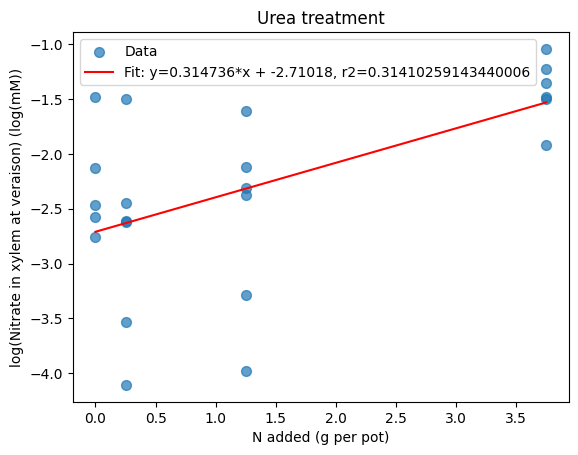

In [10]:
#Drop blanks
veru_data=veru_data.dropna()

x=veru_data['n_add']
y=np.log(veru_data['conc_mean'])

slope,intercept,r,p,stderr=linregress(x,y)

x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = intercept + slope * x_fit

plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit,y_fit, 'r-', label=f'Fit: y={slope:.6g}*x + {intercept:.6g}, r2={r**2}')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(Nitrate in xylem at veraison) (log(mM))")
plt.title("Urea treatment")
plt.legend()
plt.savefig("veraison_urea-linear.png")
plt.show()

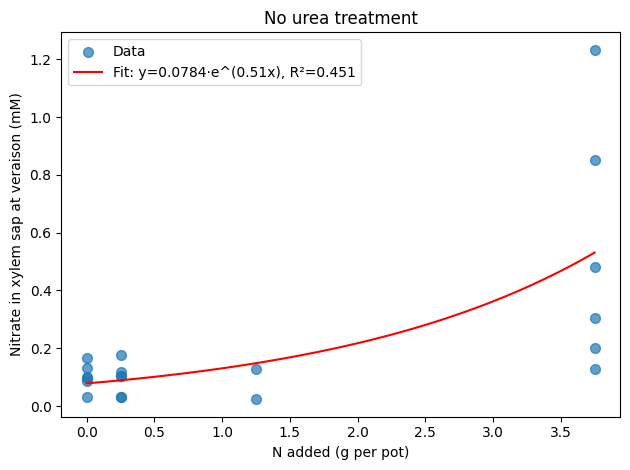

In [11]:
# define exponential model
def expo(x, a, b):
    return a * np.exp(b * x)

# filter to positive concentrations (log undefined for ≤0, and exp fits need >0)
mask = vern_data['conc_mean'] > 0
x = vern_data.loc[mask, 'n_add'].to_numpy()
y = vern_data.loc[mask, 'conc_mean'].to_numpy()

# initial guesses for parameters to help the optimizer
p0 = (y.min(), 0.05)

# fit exponential curve
popt, pcov = curve_fit(expo, x, y, p0=p0)
a, b = popt

# generate smooth x-values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = expo(x_fit, a, b)

residuals = y - expo(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

# plot data and fit
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.3g}·e^({b:.3g}x), R²={r2:.3f}')
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem sap at veraison (mM)")
plt.title("No urea treatment")
plt.legend()
plt.tight_layout()
plt.savefig("veraison_nitrate-exponential.png")
plt.show()

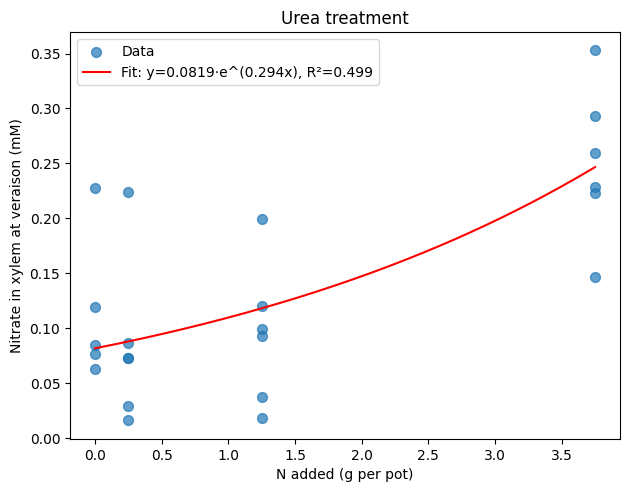

In [12]:
# define exponential model
def expo(x, a, b):
    return a * np.exp(b * x)

# filter to positive concentrations (log undefined for ≤0, and exp fits need >0)
mask = veru_data['conc_mean'] > 0
x = veru_data.loc[mask, 'n_add'].to_numpy()
y = veru_data.loc[mask, 'conc_mean'].to_numpy()

# initial guesses for parameters to help the optimizer
p0 = (y.min(), 0.05)

# fit exponential curve
popt, pcov = curve_fit(expo, x, y, p0=p0)
a, b = popt

# generate smooth x-values for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 200)
y_fit = expo(x_fit, a, b)

residuals = y - expo(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - (ss_res / ss_tot)

# plot data and fit
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: y={a:.3g}·e^({b:.3g}x), R²={r2:.3f}')
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem at veraison (mM)")
plt.legend()
plt.tight_layout()
plt.title("Urea treatment")
plt.savefig("veraison_urea-exponential.png")
plt.show()

# GLM modeling for non-normal, heteroscedastic behavior 

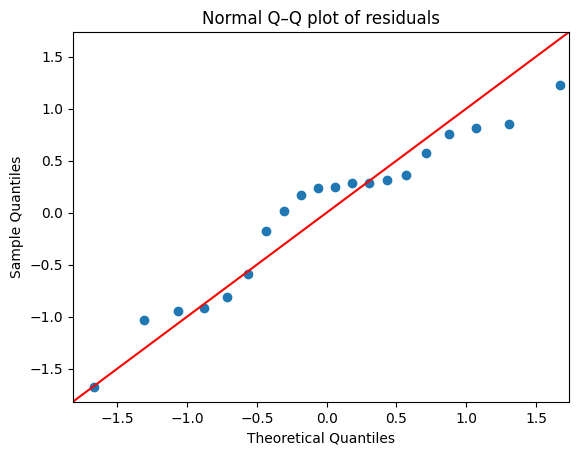

In [20]:
#Build model in different package to do fancy stats on it later 
mask = vern_data['conc_mean'] > 0
x = vern_data.loc[mask, 'n_add']
y = np.log(vern_data.loc[mask, 'conc_mean'])
X = sm.add_constant(x)
ols_log = sm.OLS(y, X).fit()

#First let's test for normality and heteroscedasticity
resid = ols_log.resid

#Q-Q plot for residuals vs "ideal" residuals to visually inspect
sm.qqplot(resid, line='45')
plt.title("Normal Q–Q plot of residuals")
plt.show()

In [14]:
#Shapiro-Wilk test for normality
shapiro_p = stats.shapiro(resid).pvalue
print(f"Shapiro–Wilk p = {shapiro_p:.4f}")

#Test for heteroscedasticity
bp = het_breuschpagan(ols_log.resid, ols_log.model.exog)
print(f"Breusch–Pagan p = {bp[1]:.4f}")


Shapiro–Wilk p = 0.2456
Breusch–Pagan p = 0.4418


In [ ]:
#This suggests there is not enough evidence to suggest these data are non-normal or heteroscedastic, but there's not much power here either

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       18
Model Family:                   Gamma   Df Model:                            1
Link Function:                    Log   Scale:                         0.41018
Method:                          IRLS   Log-Likelihood:                 19.354
Date:                Fri, 24 Oct 2025   Deviance:                       9.3080
Time:                        17:46:53   Pearson chi2:                     7.38
No. Iterations:                    11   Pseudo R-squ. (CS):             0.7963
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4225      0.185    -13.108      0.0

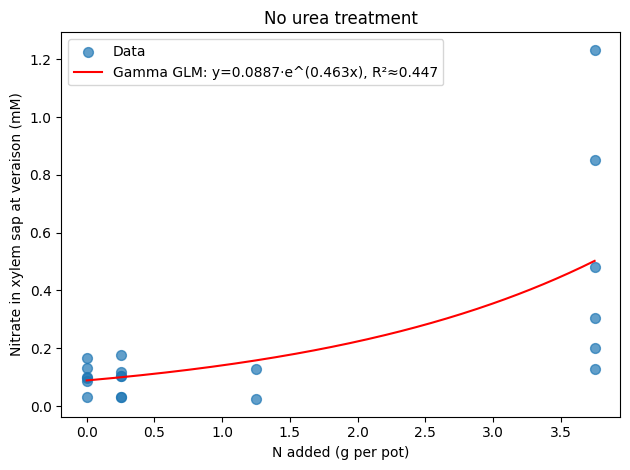

In [15]:
#Need to make sure all our values are positive first
mask = vern_data['conc_mean'] > 0
x = vern_data.loc[mask, 'n_add'].to_numpy()
y = vern_data.loc[mask, 'conc_mean'].to_numpy()

#Fit Gamma GLM with log link

#Statsmodels requires a 2D design matrix, we'll include an intercept
X = sm.add_constant(x)  # this makes columns: [1, x]

gamma_model = sm.GLM(
    y,
    X,
    family=sm.families.Gamma(link=sm.families.links.Log())
)
gamma_res = gamma_model.fit()

print(gamma_res.summary())  # optional: inspect params, p-values, etc.

# Coefficients, beta0=intercept, beta1=slope
beta0, beta1 = gamma_res.params

# Translate back to "a * exp(bx)" form
a = np.exp(beta0)
b = beta1

#Generate curve
x_fit = np.linspace(x.min(), x.max(), 200)
X_fit = sm.add_constant(x_fit)
y_fit = gamma_res.predict(X_fit)  # predicted mean response at each x_fit

#Calculate a pseudo-R² for plotting label
# GLMs don't have a true R², but you can report "explained variance" in raw y-space like you did:
y_pred = gamma_res.predict(X)  # fitted values at observed x
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2_like = 1 - ss_res/ss_tot

#Now plot results
plt.scatter(x, y, s=50, alpha=0.7, label='Data')
plt.plot(
    x_fit,
    y_fit,
    'r-',
    label=f'Gamma GLM: y={a:.3g}·e^({b:.3g}x), R²≈{r2_like:.3f}'
)
plt.xlabel("N added (g per pot)")
plt.ylabel("Nitrate in xylem sap at veraison (mM)")
plt.title("No urea treatment")
plt.legend()
plt.tight_layout()
plt.savefig("veraison_nitrate-gamma_glm.png")
plt.show()

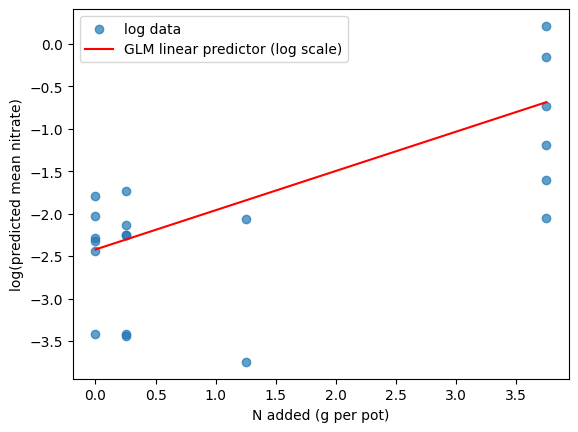

In [16]:
plt.scatter(x, np.log(y), alpha=0.7, label='log data')
plt.plot(x_fit, gamma_res.predict(X_fit, which='linear'), 'r-',
         label='GLM linear predictor (log scale)')
plt.xlabel("N added (g per pot)")
plt.ylabel("log(predicted mean nitrate)")
plt.legend()
plt.show()

/home/plashmore/.local/lib/python3.13/site-packages/statsmodels/genmod/generalized_linear_model.py:985: FutureWarning: linear keyword is deprecated, use which="linear"
  warnings.warn(msg, FutureWarning)


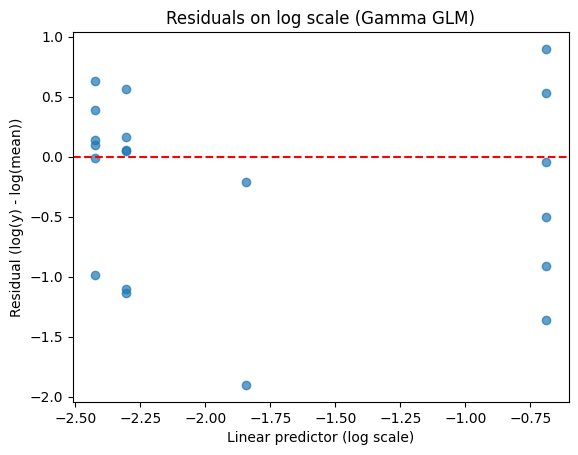

In [17]:
log_y = np.log(y)
linear_pred = gamma_res.predict(X, linear=True)
resid = log_y - linear_pred

plt.scatter(linear_pred, resid, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Linear predictor (log scale)")
plt.ylabel("Residual (log(y) - log(mean))")
plt.title("Residuals on log scale (Gamma GLM)")
plt.show()

In [18]:
x2 = x**2
X_quad = np.column_stack([np.ones_like(x), x, x2])

gamma_model2 = sm.GLM(y, X_quad, family=sm.families.Gamma(link=sm.families.links.Log()))
res2 = gamma_model2.fit()
print(res2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                   Gamma   Df Model:                            2
Link Function:                    Log   Scale:                         0.40130
Method:                          IRLS   Log-Likelihood:                 20.623
Date:                Fri, 24 Oct 2025   Deviance:                       8.2755
Time:                        17:46:53   Pearson chi2:                     6.82
No. Iterations:                     8   Pseudo R-squ. (CS):             0.8271
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2534      0.215    -10.496      0.0

In [19]:
print("Simple exp AIC:", gamma_res.aic)
print("Quadratic exp AIC:", res2.aic)

Simple exp AIC: -34.70806654949495
Quadratic exp AIC: -35.24572836707659
